**1: What is a Decision Tree, and how does it work in the context of classification?**

**Answer:**

A Decision Tree is a supervised machine learning algorithm that is commonly used for classification and regression tasks. In the context of classification, it works by splitting the dataset into smaller subsets based on feature values, ultimately creating a tree-like model that helps predict class labels.



In [ ]:
        #    Weather
         /     |     \
     Sunny   Rainy   Overcast
      |        |         |
     Wind    Temp     Play=Yes
   /    \   /    \
Weak  Strong ...
Yes     No




---



**2: Explain the concepts of Gini Impurity and Entropy as impurity measures. How do they impact the splits in a Decision Tree?**

**Answer:**

When building a decision tree for classification, the algorithm needs a way to measure how "pure" or "impure" a node is (i.e., how mixed the class labels are). Two common impurity measures are Gini Impurity and Entropy.

**1.Gini Impurity**

Definition: The probability of incorrectly classifying a randomly chosen sample from the node if you label it according to the class distribution in that node.

Gini=1−i=1∑C​(pi​)2

**2.Entropy (Information Gain)**

Definition: A measure from information theory, it quantifies the amount of uncertainty (disorder) in the data.

Gini Impurity and Entropy are measures of how mixed the classes are in a node.

Decision Trees use them to decide the "best split," by choosing the feature/threshold that maximizes the reduction in impurity.





---



**3: What is the difference between Pre-Pruning and Post-Pruning in Decision Trees? Give one practical advantage of using each.**

**Answer:**

**Pre-Pruning (a.k.a. Early Stopping)**

Definition: Stop growing the tree early, before it becomes too complex.

How it works: Impose constraints during tree construction, such as:

Maximum tree depth (max_depth)

Minimum samples required to split a node (min_samples_split)

Minimum samples required at a leaf (min_samples_leaf)

Minimum impurity decrease (min_impurity_decrease)

**Post-Pruning (a.k.a. Cost-Complexity Pruning)**

Definition: First, grow a full tree (or a very large tree) and then prune back branches that don’t improve performance.

How it works:

Build the full tree.

Use a validation set or cross-validation to measure accuracy.

Remove branches that contribute little to predictive power (e.g., cost-complexity pruning in CART).

Practical Advantage:

More accurate and less biased because the algorithm explores all possible splits first and only removes unnecessary complexity.

Example: In medical diagnosis, post-pruning ensures the tree captures subtle patterns but avoids overfitting by cutting irrelevant branches.



---



**4: What is Information Gain in Decision Trees, and why is it important for choosing the best split?**

**Answer:**

Information Gain (IG) measures the reduction in uncertainty (impurity) about the class labels after a dataset is split on a particular feature.

 In other words, it tells us how much "information" a feature gives us about the class.
 A higher Information Gain means the split is more useful for classification.

 Decision Trees need a way to choose the best split at each node.

Entropy before split: how impure/mixed the parent node is.

Entropy after split: weighted average impurity of child nodes.

Information Gain = Reduction in impurity → We want the split with the highest Information Gain.

 This ensures the chosen feature gives us the maximum clarity about the target variable.

**Information Gain** = Reduction in entropy after splitting on a feature.

**Importance**: Guides the Decision Tree to choose the feature that best separates the data, leading to shorter, more accurate trees.



---



**5: What are some common real-world applications of Decision Trees, and what are** **their main advantages and limitations? Dataset Info: ● Iris Dataset for** **classification tasks (sklearn.datasets.load_iris() or provided CSV). ● Boston** **Housing Dataset for regression tasks (sklearn.datasets.load_boston() or** ** provided CSV). use python .**

Iris Classification Accuracy: 1.0


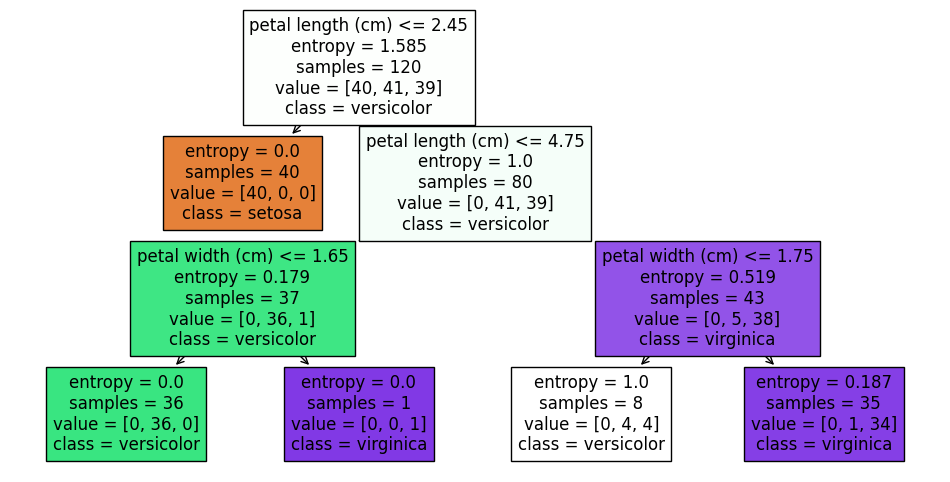

Boston Housing Regression RMSE: 4.444069555311936


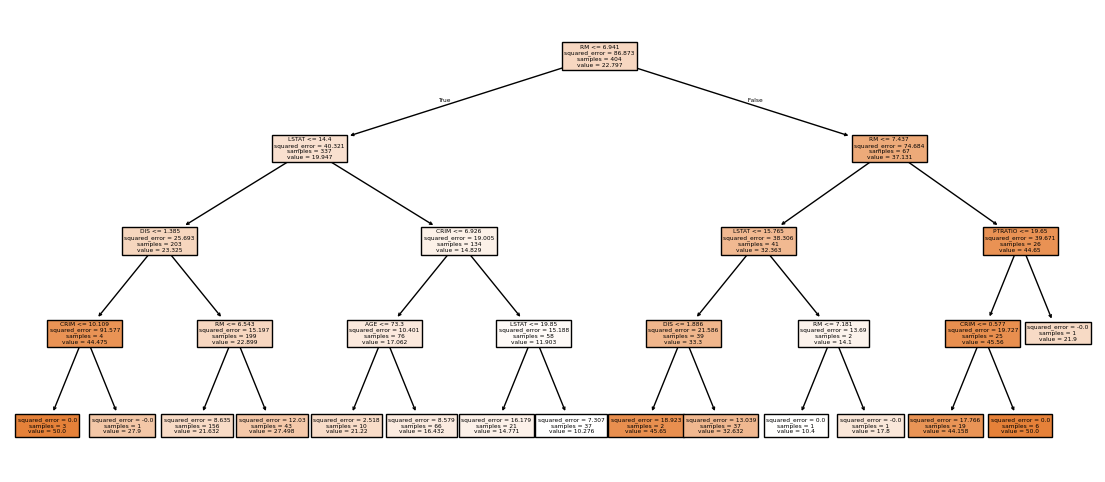

In [12]:
# Install missing dependencies
!pip install scikit-learn openml

# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# 1. Classification Example (Iris Dataset)
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Iris Classification Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# 2. Regression Example (Boston Housing Dataset)

boston = fetch_openml(name="boston", version=1, as_frame=True)
X_boston, y_boston = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Boston Housing Regression RMSE:", rmse)

plt.figure(figsize=(14,6))
plot_tree(reg, feature_names=boston.feature_names, filled=True)
plt.show()




---



**6: Write a Python program to: ● Load the Iris Dataset ● Train a Decision Tree** **Classifier using the Gini criterion ● Print the model’s accuracy and feature** **importances (Include your Python code and output in the code box below.)**

In [13]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ---------------------------
# 1. Load Iris Dataset
# ---------------------------
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 2. Train Decision Tree Classifier (using Gini criterion)
# ---------------------------
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# ---------------------------
# 3. Evaluate Model
# ---------------------------
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Classifier (Gini)")
print("--------------------------------")
print("Accuracy:", accuracy)

# Feature Importances
print("\nFeature Importances:")
for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Decision Tree Classifier (Gini)
--------------------------------
Accuracy: 1.0

Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.9346
petal width (cm): 0.0654




---



**7: Write a Python program to: ● Load the Iris Dataset ● Train a Decision Tree** **Classifier with max_depth=3 and compare its accuracy to a fully-grown tree.** **(Include your Python code and output in the code box below.)**

In [14]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ---------------------------
# 1. Load Iris Dataset
# ---------------------------
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 2. Train Decision Tree with max_depth=3
# ---------------------------
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_limited.fit(X_train, y_train)

y_pred_limited = clf_limited.predict(X_test)
acc_limited = accuracy_score(y_test, y_pred_limited)

# ---------------------------
# 3. Train Fully-Grown Decision Tree (no max_depth)
# ---------------------------
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

y_pred_full = clf_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# ---------------------------
# 4. Print Results
# ---------------------------
print("Decision Tree Classifier Comparison")
print("-----------------------------------")
print(f"Accuracy with max_depth=3: {acc_limited:.4f}")
print(f"Accuracy with full tree  : {acc_full:.4f}")


Decision Tree Classifier Comparison
-----------------------------------
Accuracy with max_depth=3: 1.0000
Accuracy with full tree  : 1.0000




---



**8: Write a Python program to: ● Load the Boston Housing Dataset ● Train a Decision Tree Regressor ● Print the Mean Squared Error (MSE) and feature importances (Include your Python code and output in the code box below.)**

In [15]:
# Install openml if not already installed (for Colab / Jupyter users)
!pip install scikit-learn openml

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# ---------------------------
# 1. Load Boston Housing Dataset
# ---------------------------
boston = fetch_openml(name="boston", version=1, as_frame=True)
X, y = boston.data, boston.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 2. Train Decision Tree Regressor
# ---------------------------
reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train)

# ---------------------------
# 3. Evaluate Model
# ---------------------------
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Decision Tree Regressor (Boston Housing)")
print("----------------------------------------")
print("Mean Squared Error (MSE):", round(mse, 4))

# Feature Importances
print("\nFeature Importances:")
for feature, importance in zip(boston.feature_names, reg.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Decision Tree Regressor (Boston Housing)
----------------------------------------
Mean Squared Error (MSE): 19.7498

Feature Importances:
CRIM: 0.0448
ZN: 0.0000
INDUS: 0.0000
CHAS: 0.0000
NOX: 0.0000
RM: 0.6446
AGE: 0.0064
DIS: 0.0689
RAD: 0.0000
TAX: 0.0000
PTRATIO: 0.0173
B: 0.0000
LSTAT: 0.2181




---



**9: Write a Python program to: ● Load the Iris Dataset ● Tune the Decision Tree’s max_depth and min_samples_split using GridSearchCV ● Print the best parameters and the resulting model accuracy (Include your Python code and output in the code box below.)**

In [16]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ---------------------------
# 1. Load Iris Dataset
# ---------------------------
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 2. Define Model and Parameter Grid
# ---------------------------
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": [2, 3, 4, 5, None],          # Try different tree depths
    "min_samples_split": [2, 3, 4, 5, 10]     # Try different min splits
}

# ---------------------------
# 3. GridSearchCV
# ---------------------------
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# ---------------------------
# 4. Best Parameters & Accuracy
# ---------------------------
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Hyperparameter Tuning (Iris Dataset)")
print("--------------------------------------------------")
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
print("Test Accuracy with Best Model:", accuracy)


Decision Tree Hyperparameter Tuning (Iris Dataset)
--------------------------------------------------
Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9416666666666668
Test Accuracy with Best Model: 1.0




---



**10: Imagine you’re working as a data scientist for a healthcare company that wants to predict whether a patient has a certain disease. You have a large dataset with mixed data types and some missing values. Explain the step-by-step process you would follow to: ● Handle the missing values ● Encode the categorical features ● Train a Decision Tree model ● Tune its hyperparameters ● Evaluate its performance And describe what business value this model could provide in the real-world setting**

**1. Handle Missing Values**

Check missingness: Use .isnull().sum() or visualization (missingno) to see how much data is missing.

Strategies:

Numerical features: Impute using mean/median (or advanced methods like KNNImputer).

Categorical features: Impute using mode (most frequent value) or introduce a new category "Unknown".

If a feature has too many missing values (e.g., >40%), consider dropping it.

In [17]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")


**2. Encode Categorical Features**

Decision Trees can handle categorical splits, but in scikit-learn we need numerical encoding.

Low-cardinality categorical features: Use One-Hot Encoding (dummy variables).

High-cardinality categorical features (e.g., hospital IDs): Use Target Encoding or Ordinal Encoding.

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")


**3. Train a Decision Tree Model**

Split dataset into train/test (e.g., 80/20).

Train a DecisionTreeClassifier.

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**4. Tune Hyperparameters**

Use GridSearchCV or RandomizedSearchCV to optimize:

max_depth: Controls tree depth (prevents overfitting).

min_samples_split: Minimum samples to split a node.

min_samples_leaf: Minimum samples per leaf node.

criterion: Gini vs Entropy.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


**5. Evaluate Performance**

Accuracy (good if dataset is balanced).

Precision & Recall (important in healthcare, since false negatives are costly).

F1-Score: Balances precision & recall.

ROC-AUC: Measures overall discrimination power.

In [22]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC for multiclass using 'ovr' strategy
try:
    roc_auc = roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test), multi_class='ovr')
    print("ROC-AUC (OvR):", roc_auc)
except AttributeError:
    print("ROC-AUC: Not applicable for this model (does not have predict_proba)")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

ROC-AUC (OvR): 1.0
